In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection  # appropriate import to draw 3d polygons
from matplotlib import style

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from math import pi

from bokeh.io import show
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import HoverTool

from matplotlib.patches import Rectangle
import math

In [33]:
data = pd.read_csv('C:/Users/86181/Desktop/nodes100_Z2.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,97.517252,101.272551,98.939221,102.525796,99.030417,102.702724,100.034673,102.756553,101.852750,98.403840,...,100.027781,101.662839,100.848816,98.526597,96.414083,98.775906,97.370481,99.402998,102.688872,98.701972
1,100.853494,102.165814,103.389176,96.601251,98.267807,95.700740,99.368202,100.615224,99.651478,99.057777,...,102.895930,97.181461,102.218537,100.485268,98.777392,97.902504,96.189617,101.088330,101.035755,103.026490
2,102.069999,99.465986,99.438353,100.056439,99.880952,103.753075,98.226773,100.908581,99.617478,99.019109,...,101.403101,97.941592,101.052174,99.486608,100.900858,99.716105,101.917287,98.362856,100.445054,103.343165
3,103.144369,99.397349,99.681911,99.473383,96.131924,100.828579,100.894970,100.434255,99.649670,103.423272,...,102.194837,101.425493,99.392110,100.278572,101.009451,98.154320,100.468589,99.330547,99.176509,99.441938
4,99.850948,102.780377,98.059553,98.442207,102.438271,97.732910,94.626028,100.818031,97.883832,99.979263,...,101.454233,100.670537,98.554859,100.115673,100.174276,101.093026,100.611641,102.209175,101.554877,101.873938


In [34]:
data = data - 100
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,-2.482748,1.272551,-1.060779,2.525796,-0.969583,2.702724,0.034673,2.756553,1.852750,-1.596160,...,0.027781,1.662839,0.848816,-1.473403,-3.585917,-1.224094,-2.629519,-0.597002,2.688872,-1.298028
1,0.853494,2.165814,3.389176,-3.398749,-1.732193,-4.299260,-0.631798,0.615224,-0.348522,-0.942223,...,2.895930,-2.818539,2.218537,0.485268,-1.222608,-2.097496,-3.810383,1.088330,1.035755,3.026490
2,2.069999,-0.534014,-0.561647,0.056439,-0.119048,3.753075,-1.773227,0.908581,-0.382522,-0.980891,...,1.403101,-2.058408,1.052174,-0.513392,0.900858,-0.283895,1.917287,-1.637144,0.445054,3.343165
3,3.144369,-0.602651,-0.318089,-0.526617,-3.868076,0.828579,0.894970,0.434255,-0.350330,3.423272,...,2.194837,1.425493,-0.607890,0.278572,1.009451,-1.845680,0.468589,-0.669453,-0.823491,-0.558062
4,-0.149052,2.780377,-1.940447,-1.557793,2.438271,-2.267090,-5.373972,0.818031,-2.116168,-0.020737,...,1.454233,0.670537,-1.445141,0.115673,0.174276,1.093026,0.611641,2.209175,1.554877,1.873938


In [35]:
val = []
sim_num = []
for i in range(len(data)):
    val = val + list(data.loc[i])
    sim_num = sim_num + 100*[i]

In [36]:
len(val)

1000

In [37]:
len(sim_num)

1000

In [38]:
data1 = {
    'val':val,
    'sim_num':sim_num
}

data11 = pd.DataFrame(data1)
data11.head()

,val,sim_num
0,-2.482748,0
1,1.272551,0
2,-1.060779,0
3,2.525796,0
4,-0.969583,0


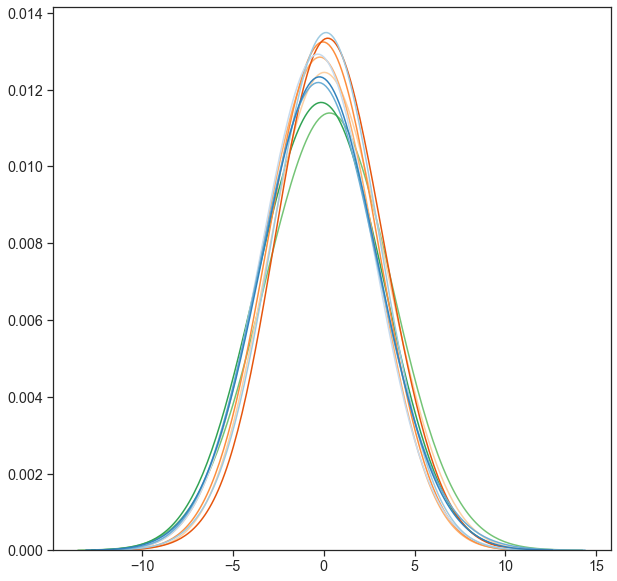

In [39]:
sns.set_theme(style="ticks",font_scale=1.3)
plt.figure(figsize=(10,10))
ax = sns.kdeplot(
    data=data11,
    x="val",
    hue='sim_num',bw_adjust=3,
    palette='tab20c'
)
ax.legend_.remove()
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.savefig('C:/Users/86181/Desktop/density_nodes100_Z2.svg',format='svg')

In [2]:
data = pd.read_csv('C:/Users/86181/Desktop/generate_lpvs.csv')
data.head()

,V1,V2,V3
0,0.009615,0.813499,0.176885
1,0.930116,0.001266,0.068619
2,0.275917,0.225361,0.498722
3,0.706404,0.025447,0.268149
4,0.471506,0.098180,0.430314


In [22]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig = px.scatter_3d(data, x='V1', y='V2', z='V3')
fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[0,1],),
                     yaxis = dict(nticks=4, range=[0,1],),
                     zaxis = dict(nticks=4, range=[0,1],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
fig.show()